##### Q2 E Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import RidgeCV
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
import math
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
import seaborn as sns

In [8]:
df_train_smote = pd.read_csv('df_train_mean.csv')


smote = SMOTE(random_state=0,sampling_strategy=0.5)
a = smote.fit_sample(df_train_smote[df_train_smote.columns[df_train_smote.columns!='class']], df_train_smote['class'])
X = pd.DataFrame(a[0])
Y = pd.DataFrame(a[1],columns=['class'])
df_train_smote = pd.concat([X,Y],axis=1)

In [9]:
df_train_smote.shape



(88500, 171)

In [10]:
print(df_train_smote['class'].value_counts())

neg    59000
pos    29500
Name: class, dtype: int64


In [11]:
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
import weka.core.jvm as jvm
from weka.classifiers import Classifier

jvm.start()

import weka.core.converters as converters

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Signalling caller


In [14]:


df_train_smote.to_csv('df_train_smote.csv',index=False)
df_train = converters.load_any_file(filename='df_train_smote.csv')
df_train.class_is_last()




In [16]:
from weka.core.classes import Random
lmt = Classifier(classname="weka.classifiers.trees.LMT")
train_eval = Evaluation(df_train)
train_eval.crossvalidate_model(classifier=lmt,data=df_train,num_folds=5,rnd=Random(0))

In [17]:
print("CV Error = %.2f%%" % (train_eval.percent_incorrect))
print(train_eval.matrix())

CV Error = 1.50%
=== Confusion Matrix ===

     a     b   <-- classified as
 58308   692 |     a = neg
   632 28868 |     b = pos



In [18]:
cls1 = Classifier.make_copy(lmt)
cls1.build_classifier(df_train)

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\Chinmay Itagi\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


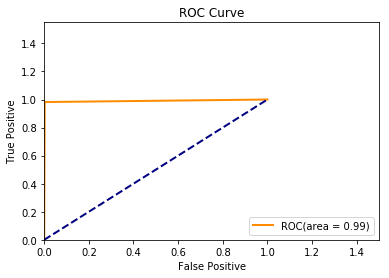

In [20]:
from sklearn.metrics import roc_curve, auc
pred = train_eval.test_model(cls1,df_train)
actual = np.array(np.where(df_train_smote['class']=='neg',0,1))
fpr, tpr, _ = roc_curve(actual,pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC(area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.5])
plt.ylim([0.0, 1.55])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
df_test = converters.load_any_file(filename='df_test_mean_last.csv')
df_test.class_is_last()

In [36]:
#lmt1.build_classifier(df_train)
test_eval1 = Evaluation(df_test)
test_eval1.test_model(cls1, df_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
print("Test Error = %.2f%%" % (test_eval1.percent_incorrect))
print(test_eval1.matrix())

Test Error = 4.71%
=== Confusion Matrix ===

     a     b   <-- classified as
 14943   682 |     a = neg
    72   303 |     b = pos



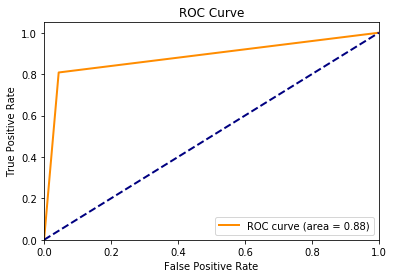

In [41]:
df_test_ = pd.read_csv('df_test_mean_last.csv') 
pred = test_eval1.test_model(cls1,df_test)
actual = np.array(np.where(df_test_['class']=='neg',0,1))
fpr, tpr, _ = roc_curve(actual,pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()